In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

In [2]:
dfs = pd.read_csv('salary.csv')
dfp = pd.read_csv('plusstats.csv')
dfp.rename(columns = {'name' : 'Name'}, inplace = True)
show(dfs)
show(dfp)

Loading ITables v2.5.2 from the internet... (need help?)


Loading ITables v2.5.2 from the internet... (need help?)


In [3]:
df = pd.merge(dfp, dfs, on = 'Name', how = 'left')
show(df)

Loading ITables v2.5.2 from the internet... (need help?)


In [4]:
df = df.dropna()
df['Salary'] = df['Salary'].str.replace('$', '')
df['Salary'] = df['Salary'].str.replace(',', '')
df['Salary'] = df['Salary'].apply(lambda x: int(x))
show(df)

Loading ITables v2.5.2 from the internet... (need help?)


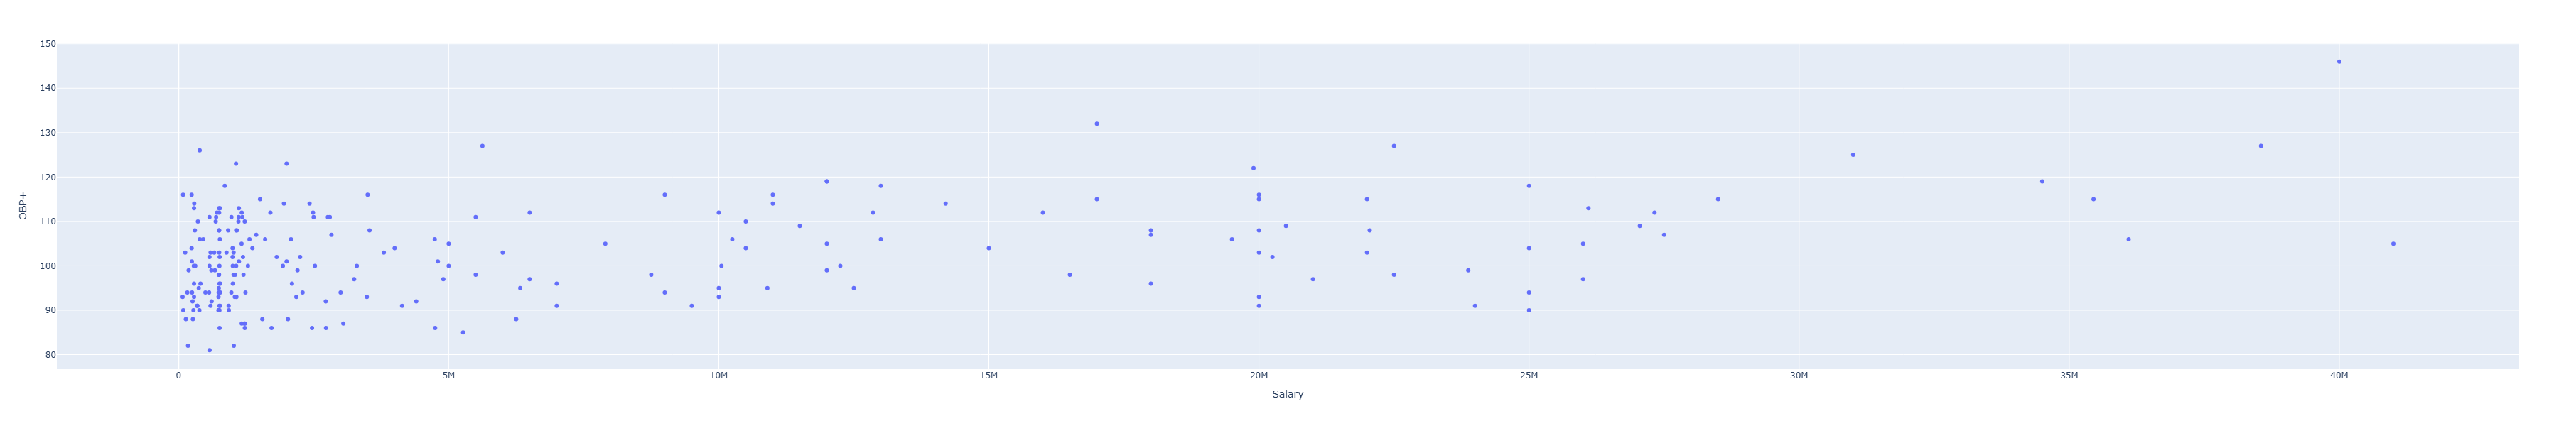

In [5]:
fig = px.scatter(df,
                 x = 'Salary',
                 y = 'OBP+',
                 hover_data = 'Name')

fig.update_layout(width = 800,
                  height = 600)

fig.show()

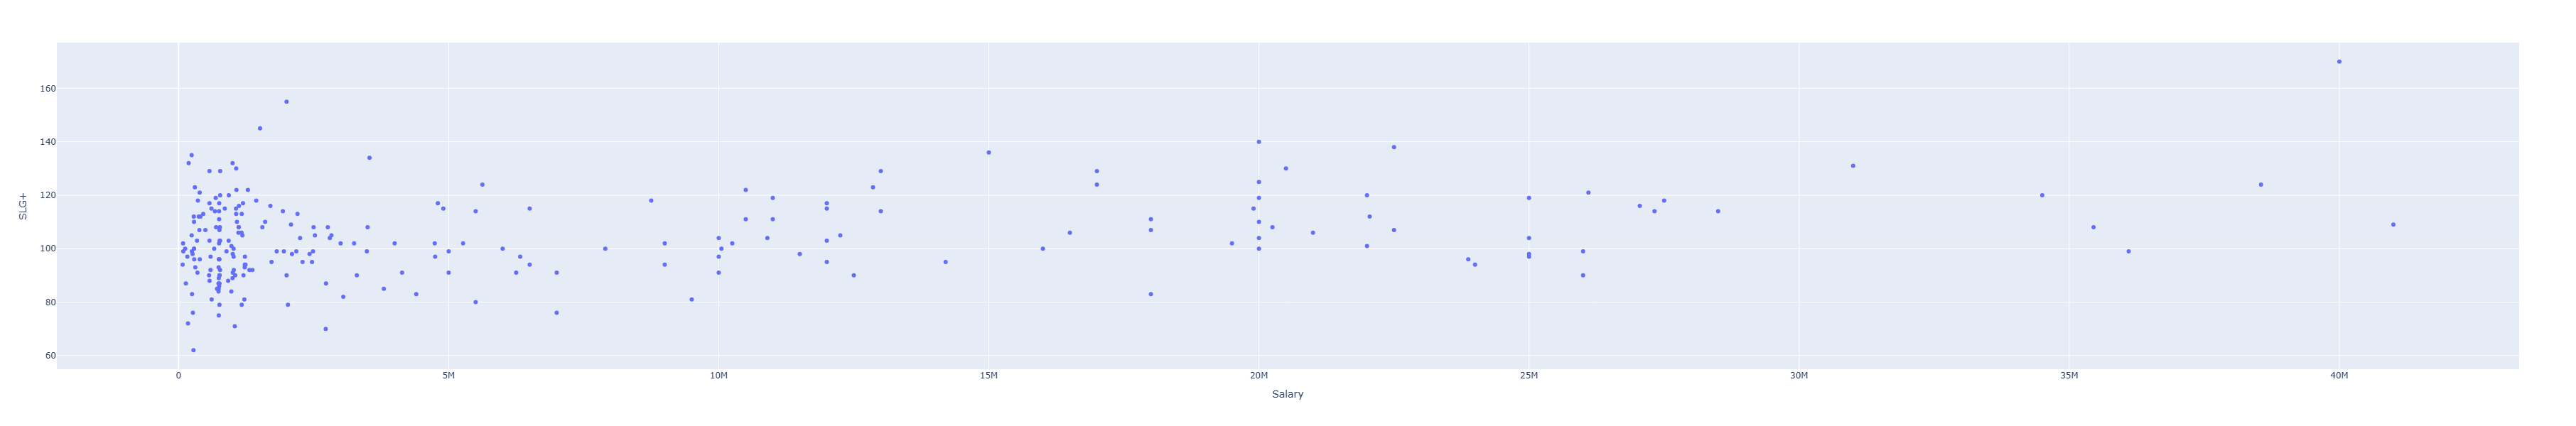

In [6]:
fig = px.scatter(df,
                 x = 'Salary',
                 y = 'SLG+',
                 hover_data = 'Name')

fig.update_layout(width = 800,
                  height = 600)

fig.show()

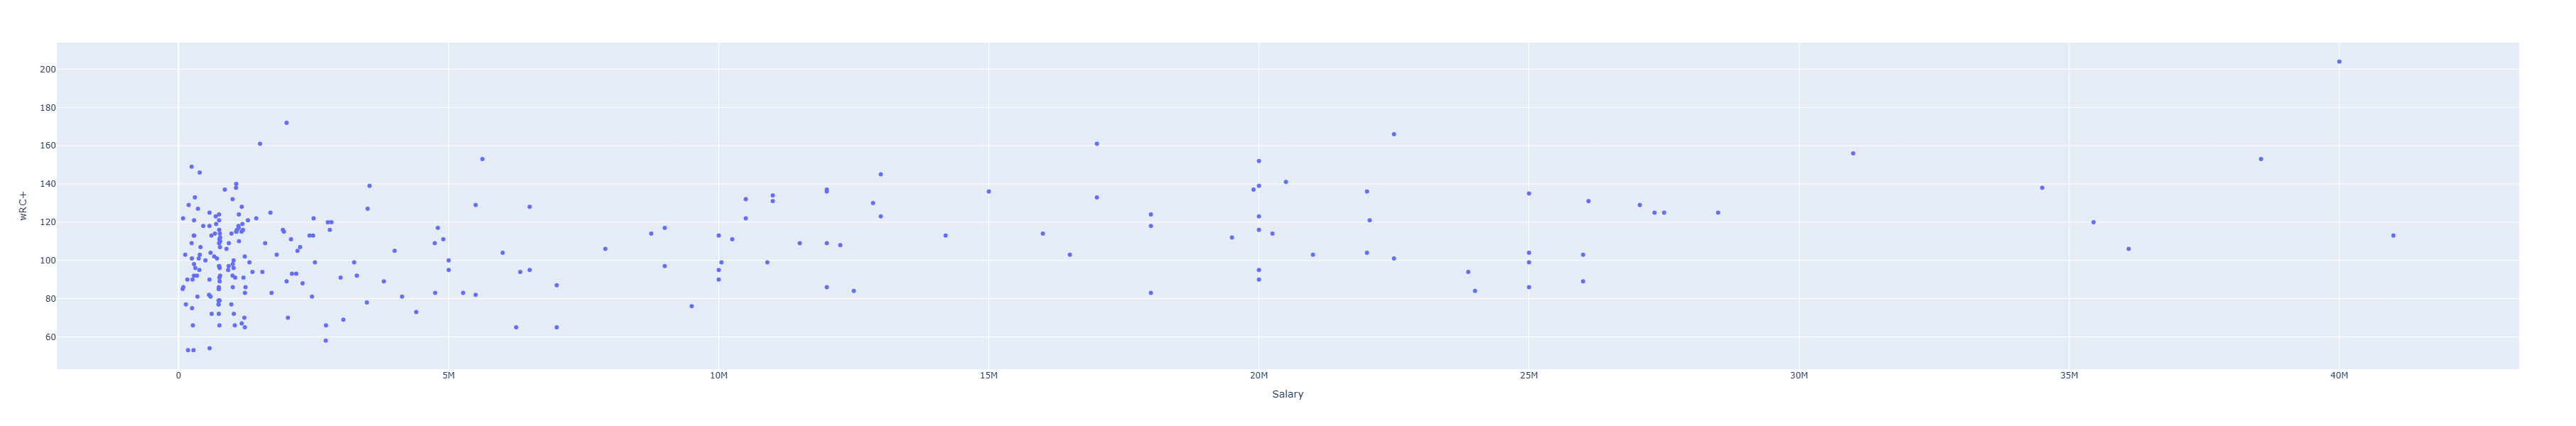

In [7]:
fig = px.scatter(df,
                 x = 'Salary',
                 y = 'wRC+',
                 hover_data = 'Name')

fig.update_layout(width = 800,
                  height = 600)

fig.show()

In [8]:
df['salcat'] = 'none'
for k in df.index:
    if df['Salary'].loc[k] < 1000000:
        df.loc[k, 'salcat'] = '<1M'
    elif (df['Salary'].loc[k] >= 1000000) & (df['Salary'].loc[k] < 10000000):
        df.loc[k, 'salcat'] = '1 - 10M'
    elif (df['Salary'].loc[k] >= 10000000) & (df['Salary'].loc[k] < 20000000):
        df.loc[k, 'salcat'] = '10 - 20M'
    elif (df['Salary'].loc[k] >= 20000000) & (df['Salary'].loc[k] < 30000000):
        df.loc[k, 'salcat'] = '20 - 30M'
    elif (df['Salary'].loc[k] >= 40000000) & (df['Salary'].loc[k] < 50000000):
        df.loc[k, 'salcat'] = '40 - 50M'
    else:
        df.loc[k, 'salcat'] = '>50M'


In [9]:
show(df)

Loading ITables v2.5.2 from the internet... (need help?)


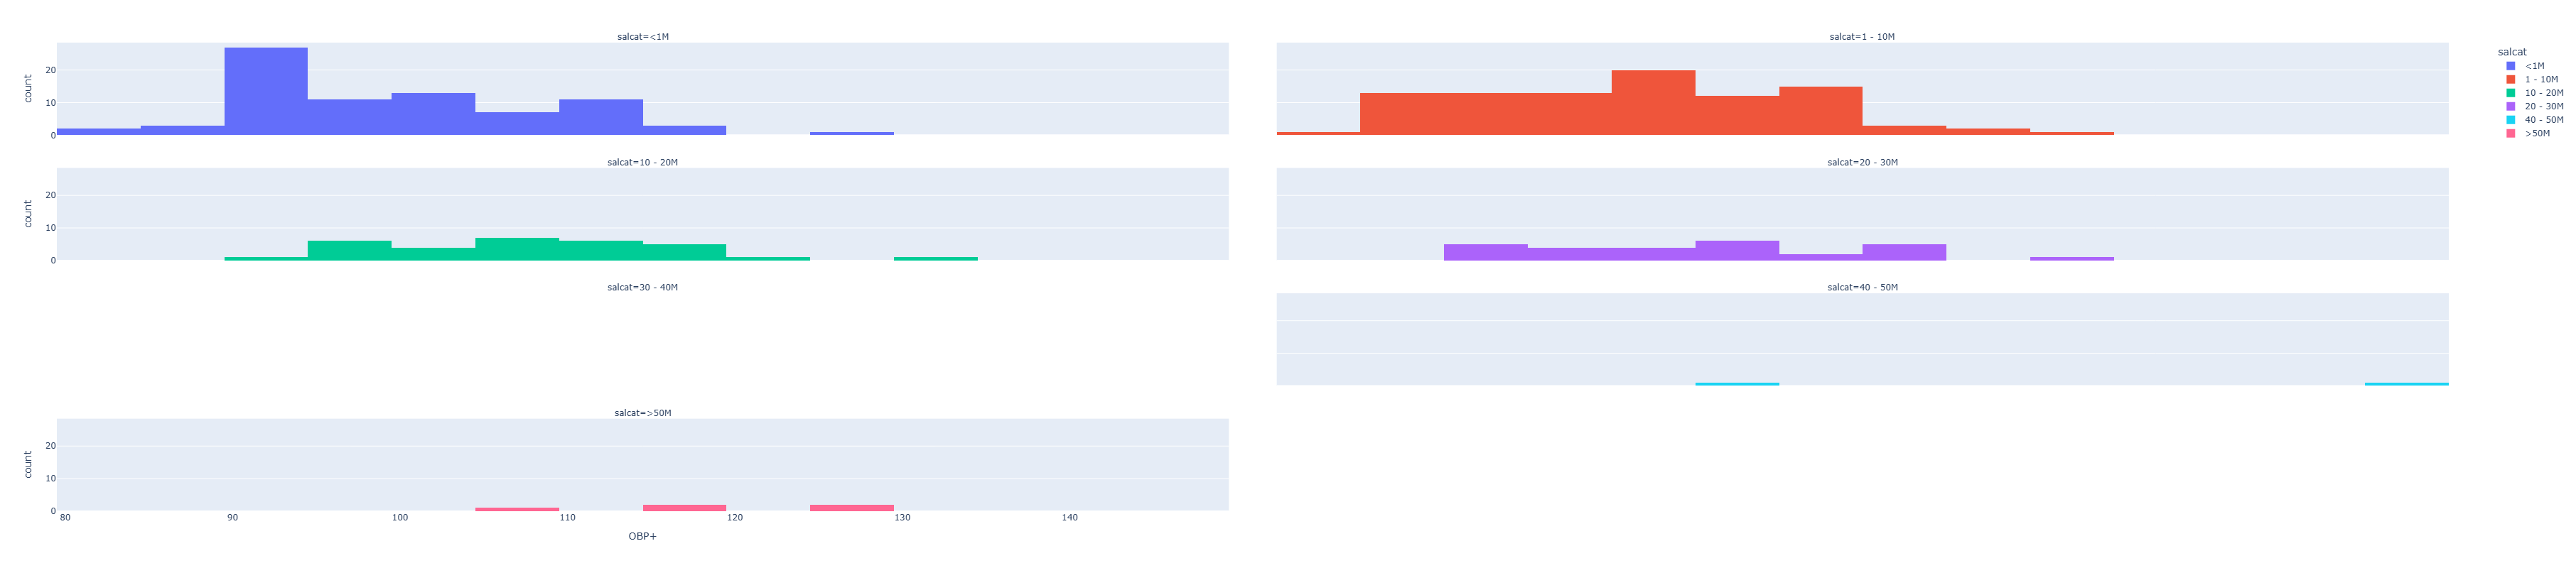

In [10]:
desired_order = ['<1M', '1 - 10M', '10 - 20M', '20 - 30M', '30 - 40M', '40 - 50M', '>50M']
fig = px.histogram(df,
                   x = 'OBP+',
                   color = 'salcat',
                   category_orders={'salcat': desired_order},
                   barmode = 'relative',
                   facet_col = 'salcat',
                   facet_col_wrap = 2)

fig.update_layout(width = 1000,
                  height = 800)

fig.show()

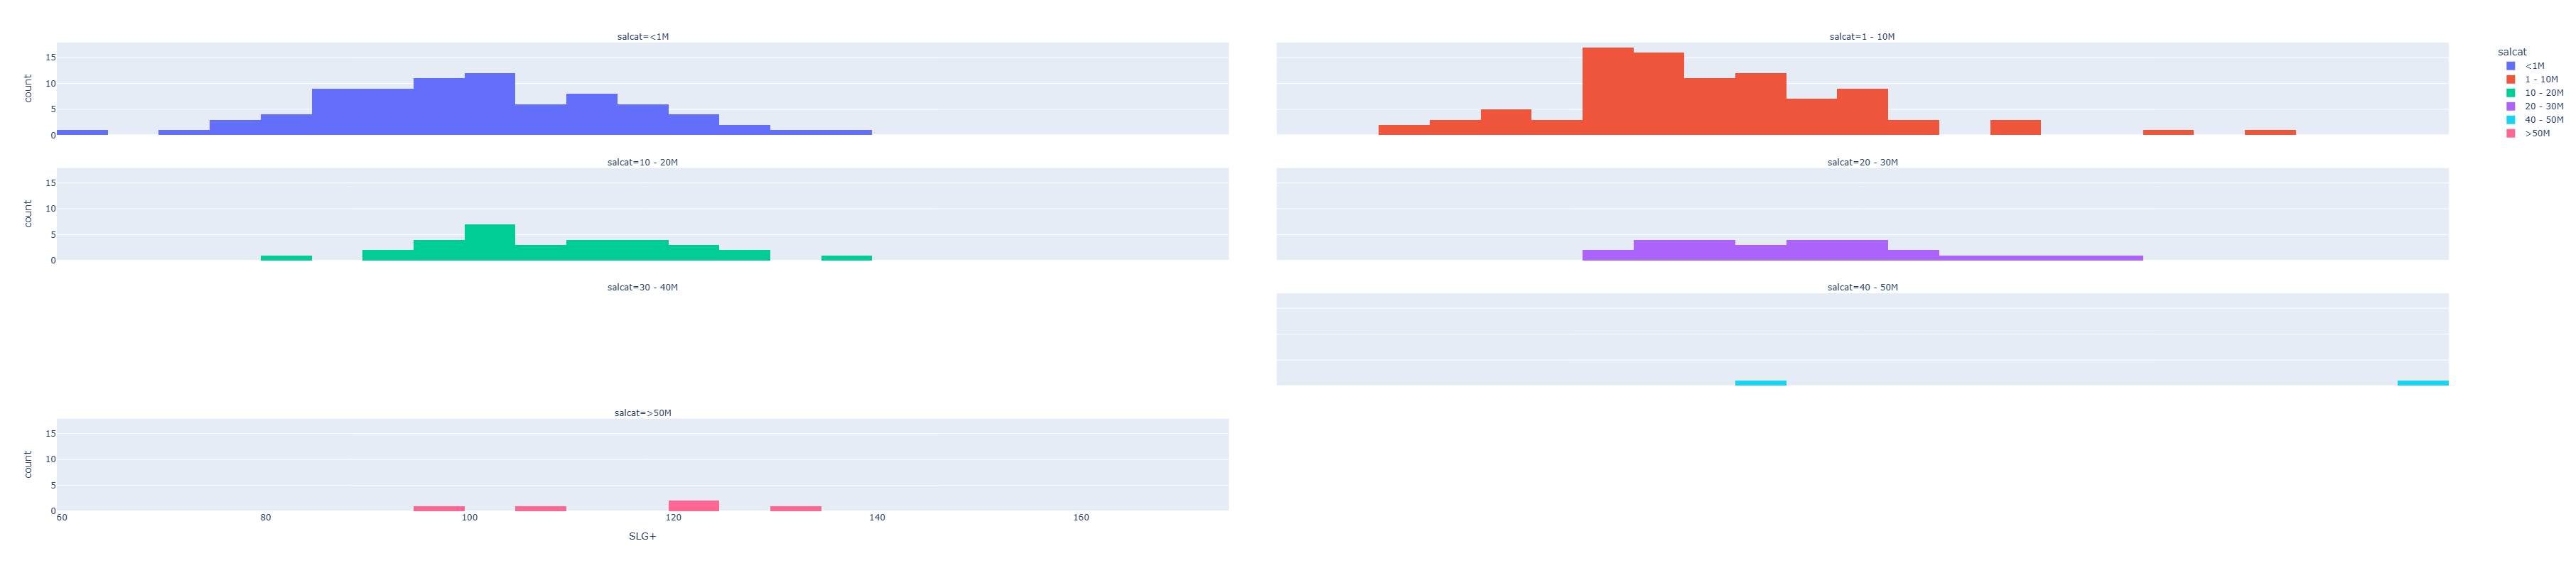

In [11]:
desired_order = ['<1M', '1 - 10M', '10 - 20M', '20 - 30M', '30 - 40M', '40 - 50M', '>50M']
fig = px.histogram(df,
                   x = 'SLG+',
                   color = 'salcat',
                   category_orders={'salcat': desired_order},
                   barmode = 'relative',
                   facet_col = 'salcat',
                   facet_col_wrap = 2)

fig.update_layout(width = 1000,
                  height = 800)

fig.show()

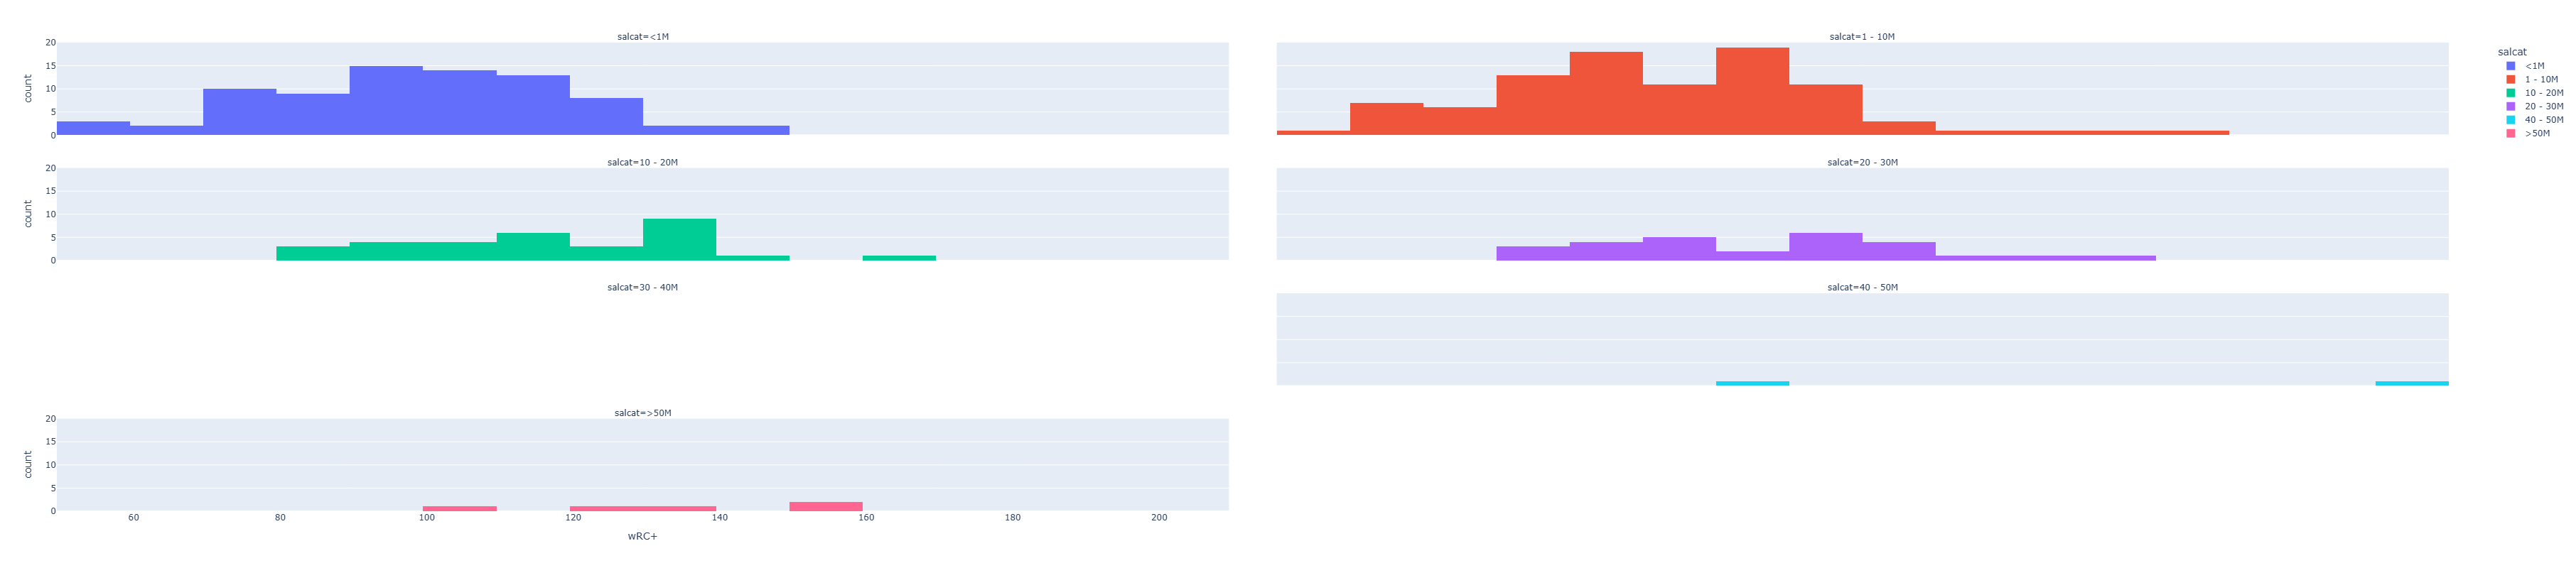

In [12]:
desired_order = ['<1M', '1 - 10M', '10 - 20M', '20 - 30M', '30 - 40M', '40 - 50M', '>50M']
fig = px.histogram(df,
                   x = 'wRC+',
                   color = 'salcat',
                   category_orders={'salcat': desired_order},
                   barmode = 'relative',
                   facet_col = 'salcat',
                   facet_col_wrap = 2)

fig.update_layout(width = 1000,
                  height = 800)

fig.show()

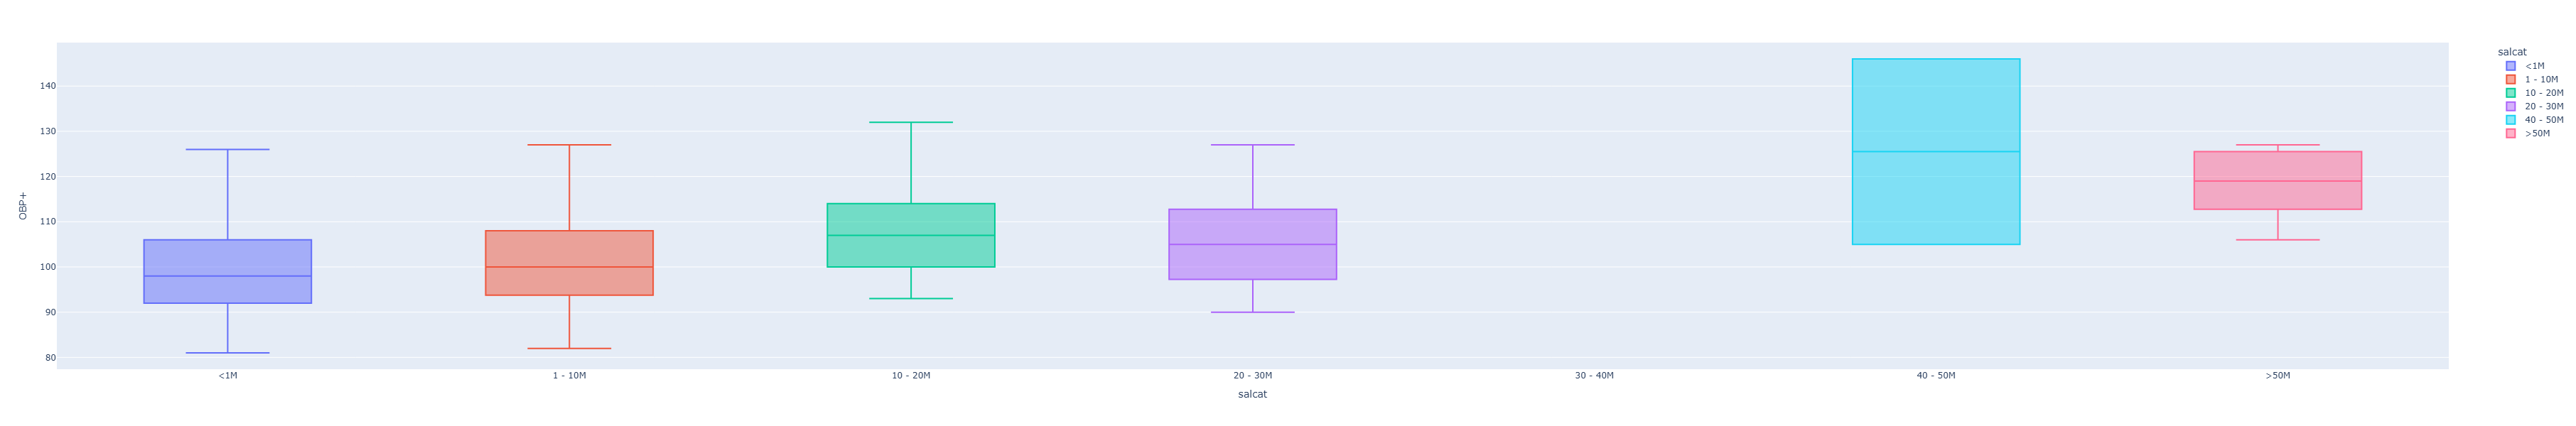

In [13]:
desired_order = ['<1M', '1 - 10M', '10 - 20M', '20 - 30M', '30 - 40M', '40 - 50M', '>50M']
fig = px.box(df,
             x = 'salcat',
             y = 'OBP+',
             category_orders={'salcat': desired_order},
             color = 'salcat')

fig.update_layout(width = 800,
                  height = 600)

fig.show()

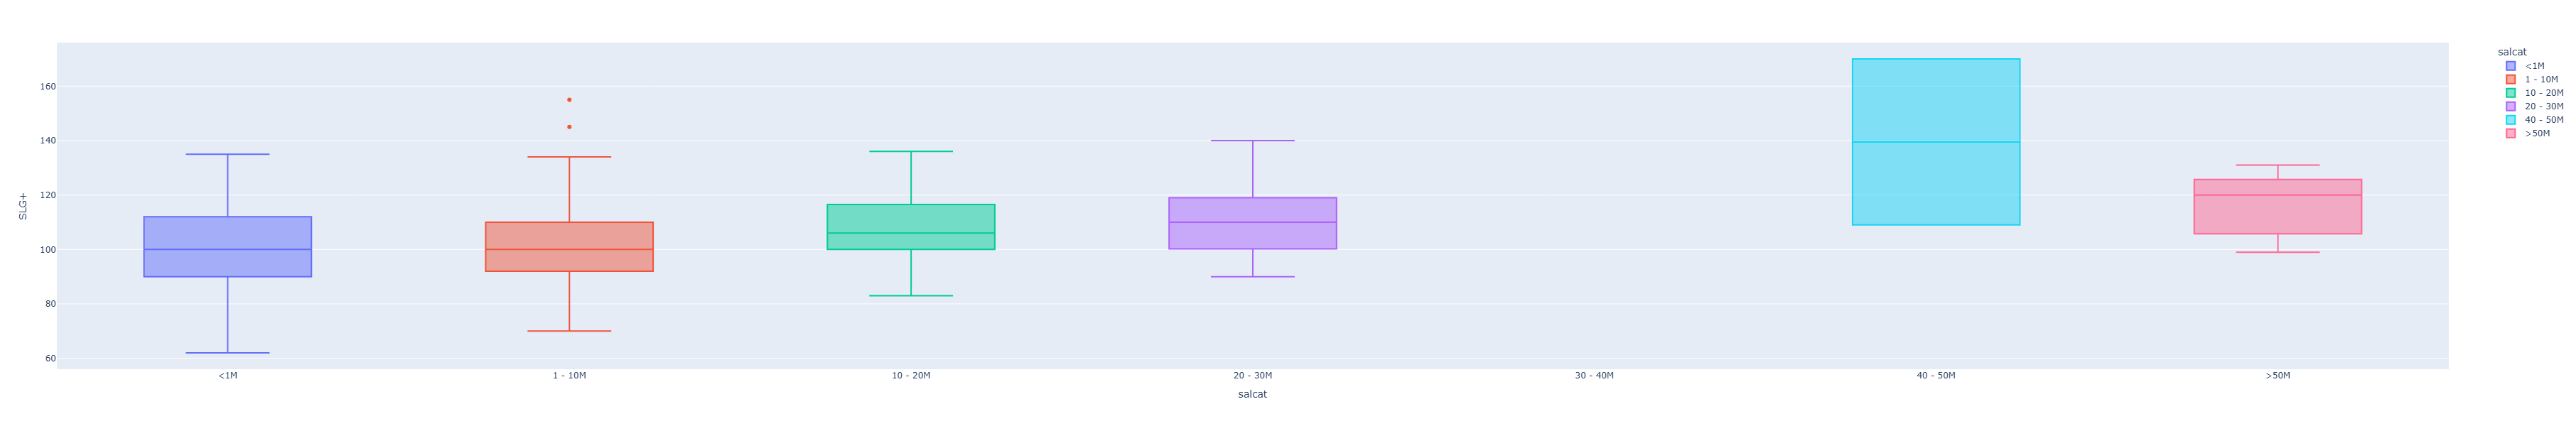

In [14]:
desired_order = ['<1M', '1 - 10M', '10 - 20M', '20 - 30M', '30 - 40M', '40 - 50M', '>50M']
fig = px.box(df,
             x = 'salcat',
             y = 'SLG+',
             category_orders={'salcat': desired_order},
             color = 'salcat')

fig.update_layout(width = 800,
                  height = 600)

fig.show()

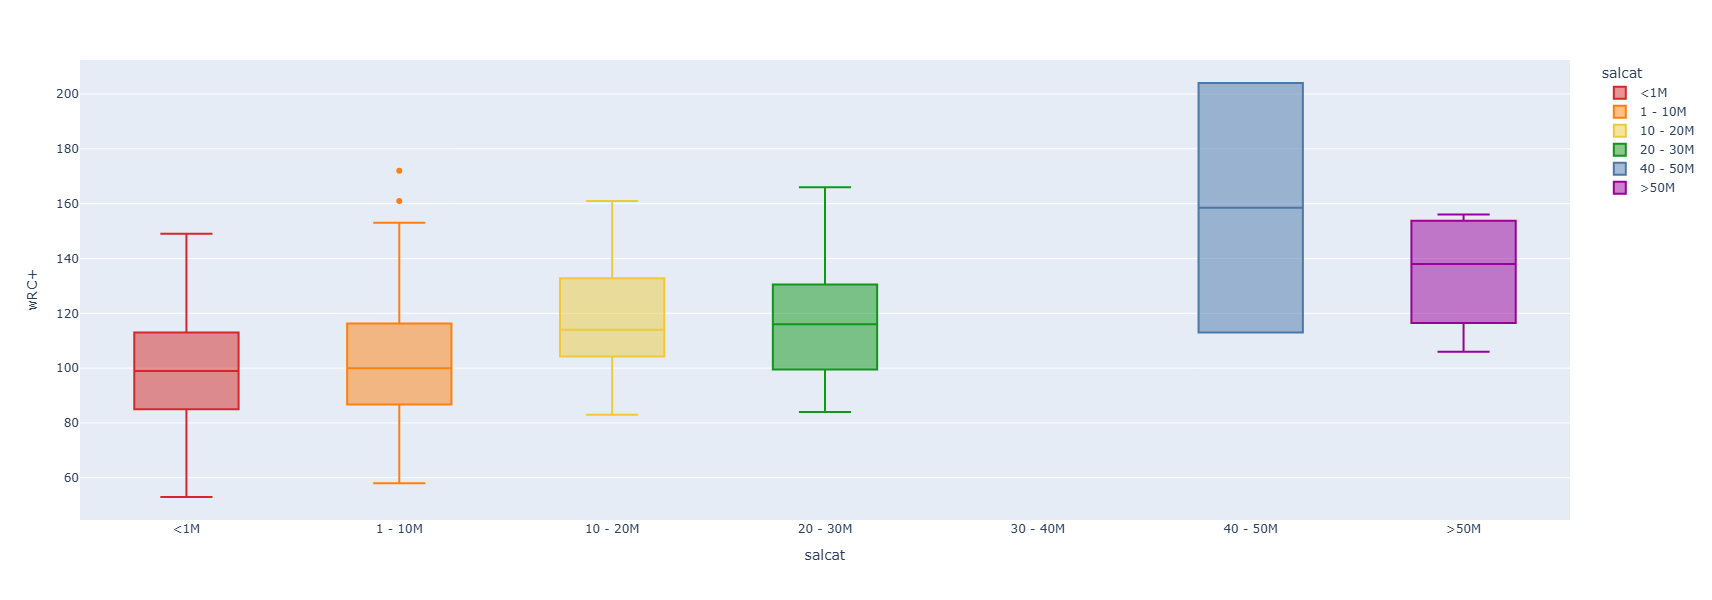

In [25]:
desired_order = ['<1M', '1 - 10M', '10 - 20M', '20 - 30M', '30 - 40M', '40 - 50M', '>50M']
fig = px.box(df,
             x = 'salcat',
             y = 'wRC+',
             category_orders={'salcat': desired_order},
             color = 'salcat',
             color_discrete_sequence = (['#D62728', '#FF7F0E', '#EECA3B', '#109618', '#9467BD', '#4C78A8', '#990099']))

fig.update_layout(width = 800,
                  height = 600)

fig.show()

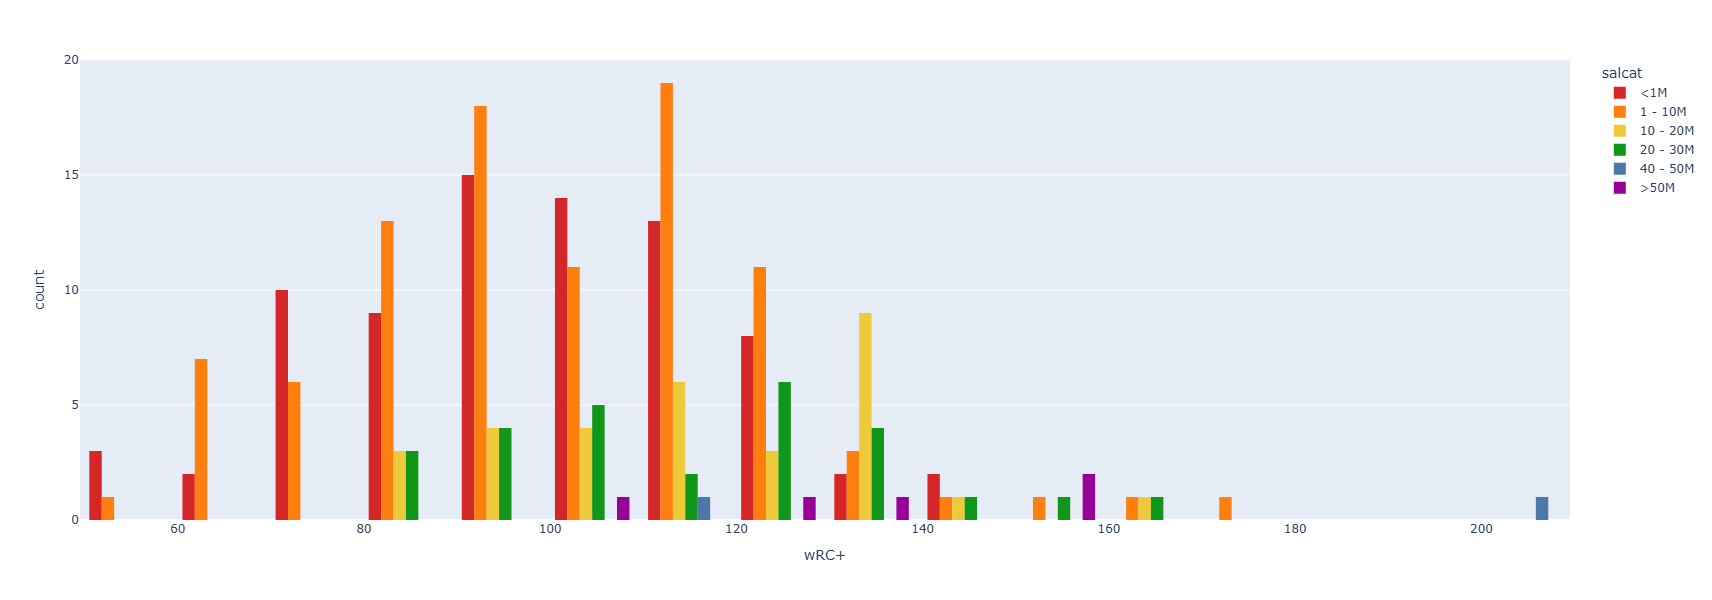

In [28]:
desired_order = ['<1M', '1 - 10M', '10 - 20M', '20 - 30M', '30 - 40M', '40 - 50M', '>50M']

fig = px.histogram(df,
                   x = 'wRC+',
                   color = 'salcat',
                   category_orders={'salcat': desired_order},
                   color_discrete_sequence = (['#D62728', '#FF7F0E', '#EECA3B', '#109618', '#9467BD', '#4C78A8', '#990099']),
                   barmode = 'group')

fig.update_layout(width = 800,
                  height = 600)

fig.show()